## Importing Libraries

In [4]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing Data Set

In [5]:
dataset = pd.read_csv('dataset/pca-sleep-efficiency.csv')
dataset.head()

,id,age,gender,bed_time,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,...,smoking_status,exercise_frequency,exercise_frequency_filled,bed_time_edited,bed_time_encoded,wakeup_time_edited,wakeup_time_encoded,smoking,gender_type,sleep_quality
0,1,65,Female,01:00,07:00,6.0,0.88,18,70,12,...,Yes,3.0,3.0,1,1.0,7,7.0,1,0,-1.038628
1,2,69,Male,02:00,09:00,7.0,0.66,19,28,53,...,Yes,3.0,3.0,2,2.0,9,9.0,1,1,1.705723
2,3,40,Female,21:30,05:30,8.0,0.89,20,70,10,...,No,3.0,3.0,21,21.0,5,5.0,0,0,-0.876008
3,4,40,Female,02:30,08:30,6.0,0.51,23,25,52,...,Yes,1.0,1.0,2,2.0,8,8.0,1,0,2.028781
4,5,57,Male,01:00,09:00,8.0,0.76,27,55,18,...,No,3.0,3.0,1,1.0,9,9.0,0,1,0.192627


## Multivariate Linear Regression

### Multivariate Linear Regression based on Sleep Quality w.r.t. Lifestyle Choices (bed time, sleep duration, caffeine consumption, alcohol consumption, smoking)

### Splitting data into Train and Test

In [10]:
X = dataset[['age','gender_type','wakeup_time_encoded','bed_time_encoded','sleep_duration', 'exercise_frequency_filled', 'caffeine_consumption_filled', 'alcohol_consumption_filled', 'smoking']]
y = dataset['sleep_quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


### Plotting the Multivariate Linear Regression Model

Intercept of Regression 	: b =  -0.20651546962488215
Coefficients of Regression 	: a =  [-0.00863405  0.10232649  0.12933674  0.02091559 -0.07323514 -0.20613154
 -0.00258934  0.23250168  0.32277775]


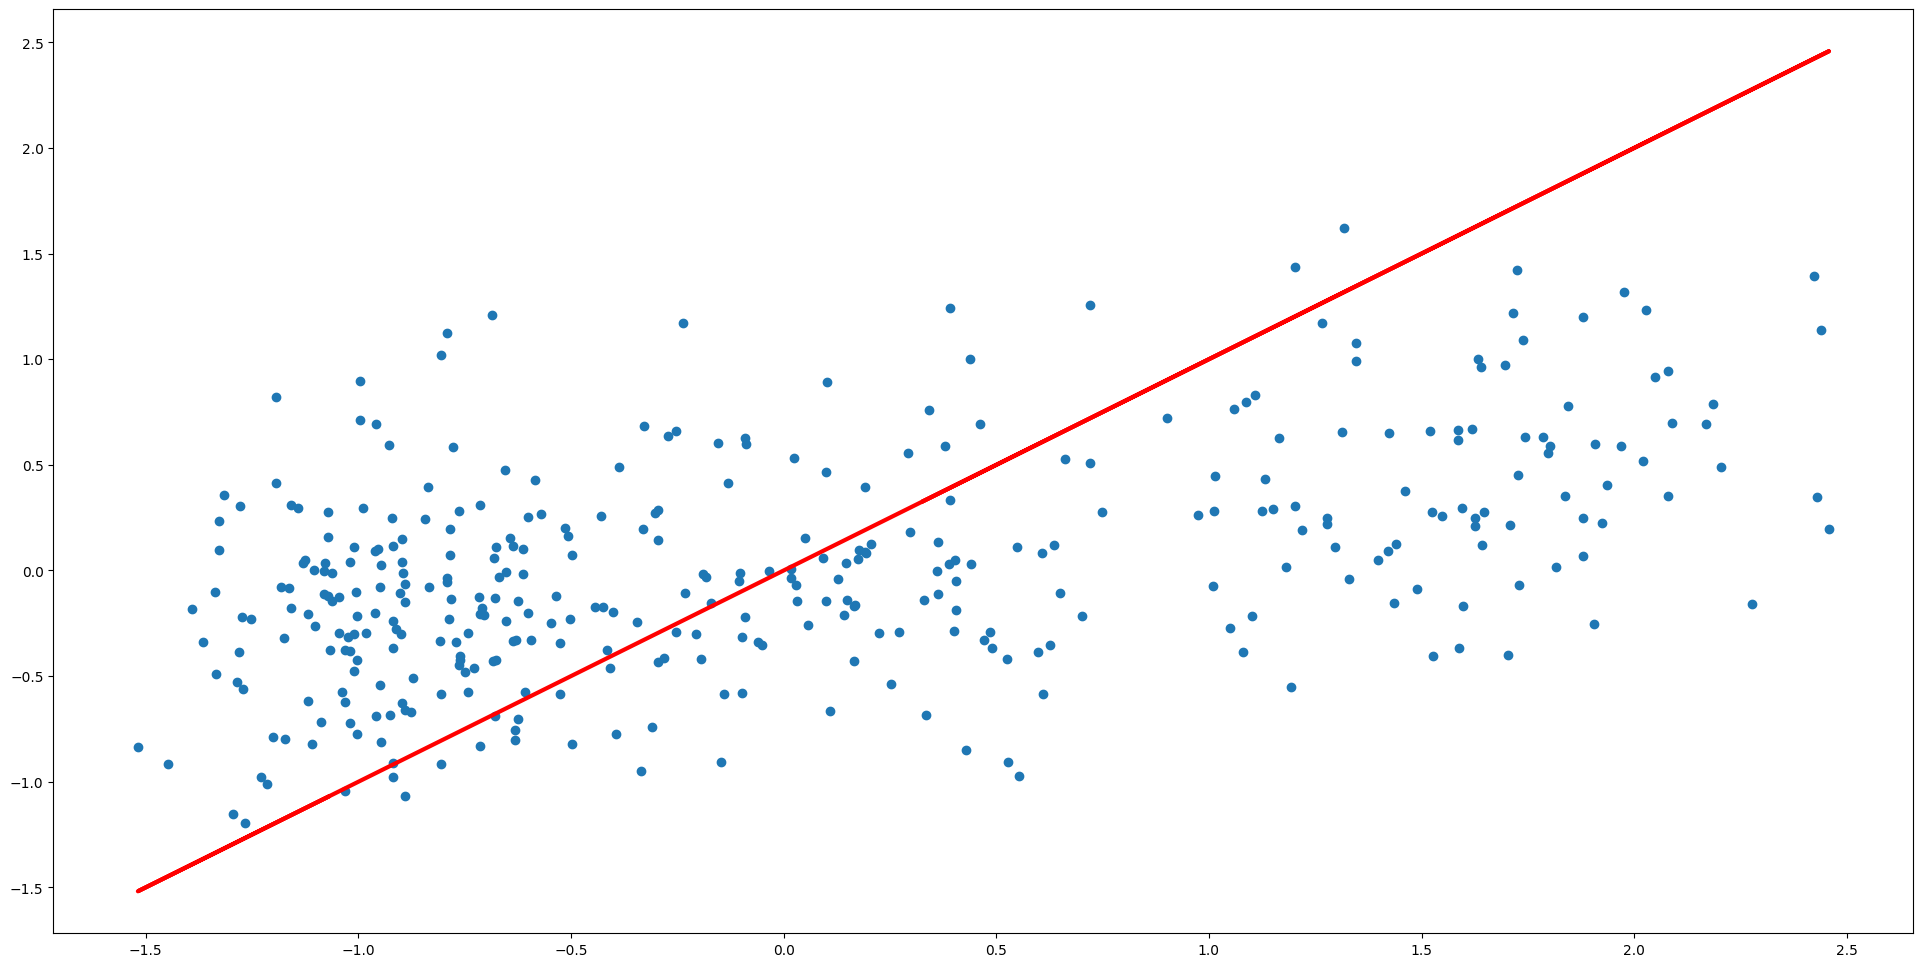

In [11]:
# Create a LinearRegression object
linreg = LinearRegression()

# Fit the model to the training data
linreg.fit(X_train, y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

# Predict the response variable for the testing set
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the regression line
f = plt.figure(figsize=(24, 12))
plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train, 'r-', linewidth = 3)
plt.show()

### Evaluating Model's Performance

In [ ]:
# Check the Goodness of Fit of model on the Train set
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
#Check Prediction accuracy of the model on the Test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("R-squared \t:", r2_score(y_test, y_test_pred))

Explained Variance (R^2) 	: 0.2552674232223401
Mean Squared Error (MSE) 	: 0.7677850631750406
Root Mean Squared Error (RMSE) 	: 0.8762334524400678
R-squared 	: 0.2763544507069652


r2_score (also known as the coefficient of determination) measures the proportion of variance in the response variable that is explained by the predictors in the model. It is defined as 1 minus the ratio of the residual variance to the total variance of the response variable. The r2_score ranges from -1 to 1, with higher values indicating a better fit of the model to the data. A value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variability in the response variable.

### Making Predictions based on model?